In [229]:
# 결측치 처리 -> 삭제(행,열) / 대체
# 범주형 데이터 처리 -> 순위형 인코딩, 명목형 인코딩(OneHotEncoding)
# Scaling -> MinMaxScaler, StandardScaler
# 기존 컬럼 제거 or 새로운 컬럼 추가하는 작업도 중요
# Test-Train split

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
titanic_train = pd.read_csv('data-files/a2.titanic-train.csv')
titanic_test = pd.read_csv('data-files/a2.titanic-test.csv')

titanic_train_backup = titanic_train.copy()
titanic_test_backup = titanic_test.copy()


In [232]:
titanic_train.info() # cabin col은 너무 데이터 양이 적어서 col지움

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [233]:
titanic_train_backup # survived feature O -> y값 미리 줘서 지도학습
titanic_test_backup # survived feature X -> y값 주지 않고 y값 찾게 하기 y=w1x1+..+wnxn

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [234]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
na = titanic_train.isna()
# na
na.sum() # na값 True : 1 False : 0으로 해석
# type(na.sum()) # Series -> 1차원 배열
na.sum().sort_values(ascending=False) # 정렬방식은 ascending=으로 정하기
na_ratio = na.sum() / na.count()
na_ratio.sort_values(ascending=False) # 좀 더 명확하게 보이도록 퍼센티지로 보임

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [236]:
# NaN 데이터 제거 (열을 제거하는 방식 - NaN 비중이 과도하게 높은 열 제거)
# titanic_train.drop('Cabin', axis=1) #방향과 지정은 조금 다름. 방향은 위~아래가 행, 지정은 왼~오가 행. 여기는 지정 # drop은 삭제한 복사본 생성
titanic_train.drop('Cabin', axis=1, inplace=True) # 원본에서 삭제(열)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [237]:
titanic_train['Age'].fillna(age_mean, inplace=True)
titanic_train.loc

In [238]:
titanic_train.loc[age_na_row]['Age']

5      29.699118
17     29.699118
19     29.699118
26     29.699118
28     29.699118
         ...    
859    29.699118
863    29.699118
868    29.699118
878    29.699118
888    29.699118
Name: Age, Length: 177, dtype: float64

In [239]:
# 결측치(NaN) 처리 : 값 대체(평균값으로 NaN을 대체)
age_na_row = titanic_train["Age"].isna()
age_mean = titanic_train["Age"].mean()
age_mean
titanic_train['Age'].fillna(age_mean, inplace=True) # 원본을 수정
titanic_train.loc[age_na_row]['Age'] # age만


Series([], Name: Age, dtype: float64)

In [240]:
# 결측치(NaN) 처리 : 삭제(행 삭제 - 삭제하는 데이터 양이 적을 때 사용하는 방법)
titanic_train.dropna(axis=0, inplace=True)
titanic_train.info() # na값 2개 지워져서 889개여도 행 개수는 줄어들지 않음 (890개) -> 비어있는 상태로 유지

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [241]:
temp_df = titanic_train.reset_index() # reset_index : 새 인덱스를 만들고 원래 인덱스는 일반 컬럼으로 변경  -> 888 890으로 나옴
temp_df.tail()
temp_df = titanic_train.reset_index(drop=True)# reset_index : 새 인덱스를 만들고 원래 인덱스는 제거
temp_df.tail()
# set_index : 특정 컬럼을 인덱스로 변경 사용
temp_df = titanic_train.set_index(["PassengerId"]) #PassengeId가 index로 들어옴
temp_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [242]:
# 의미 없는 컬럼 제거
titanic_train.drop('PassengerId', axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [243]:
# 새 컬럼 추가(기존 컬럼의 데이터를 결합해서)
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [244]:
# 관련 없는 컬럼 제거 2
titanic_train.drop(['Name','SibSp','Parch','Ticket'], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [245]:
# titanic_train_backup['Name'].str.split() # str = 각 컬럼을 문자열로 바꿔줌
title_column = titanic_train_backup["Name"].str.extract('([A-Za-z]+)\.') #정규표현식(패턴 찾는 형식) - 문자열 안에서 [ 영문자 1개 이상 + '.' ]인 부분 문자열 추출 # 대소문자 섞어서 한 번 이상
titanic_train['Title'] = title_column
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [246]:
titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

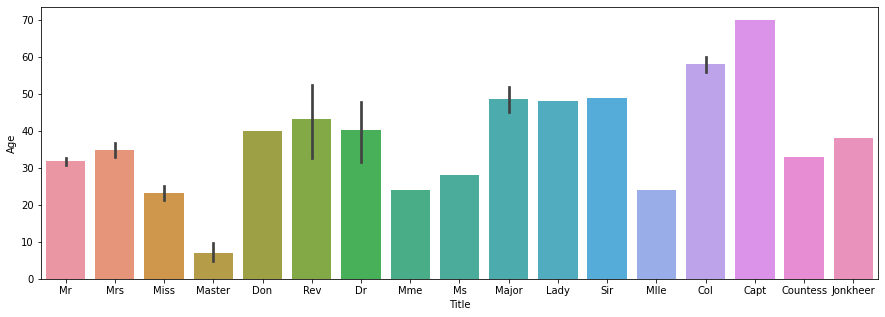

In [247]:
plt.figure(figsize=(15,5))
sns.barplot(x=titanic_train['Title'], y=titanic_train['Age']) # 평균값 가져오기
plt.show()
plt.figure(figsize=(15,5))

In [248]:
age_means_by_title = titanic_train.groupby('Title')['Age'].mean() # groupby는 title이 같은 데이터를 모아서(groupby) 그룹별로 age의 평균 계산
age_means_by_title
titanic_train.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          40.242731
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       7.086662
Miss        23.260598
Mlle        24.000000
Mme         24.000000
Mr          31.753762
Mrs         34.837782
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [249]:
map_means = age_means_by_title.to_dict()
map_means # series를 dictionary로 바꿔주자

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 40.242731092436976,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 7.08666176470588,
 'Miss': 23.260597985050364,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 31.753762088974813,
 'Mrs': 34.83778225806451,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [250]:
titanic_train['Title'].loc[idx_nan_age].map(map_means) #map에의해 key값이 value로 바뀜 {mr:10 miss:50 ms:30}이면 mr가 10이되고 miss가 50이됨 #title에 일치하는 평균값 가져옴

5      31.753762
17     31.753762
19     34.837782
26     31.753762
28     23.260598
         ...    
859    31.753762
863    23.260598
868    31.753762
878    31.753762
888    23.260598
Name: Title, Length: 177, dtype: float64

In [263]:
nan_age = titanic_train['Age'] == titanic_train_backup['Age'].mean()# 두 값이 같으면 T,F값으로 nan_age에 넣는다.
nan_age
idx_nan_age=titanic_train[nan_age].index # nan_age인 행 번호 넣기
idx_nan_age
titanic_train.loc[idx_nan_age, 'Age2'] = titanic_train['Title'].loc[idx_nan_age].map(map_means) # nan 행의 age2열에 대해

In [265]:
#NaN을 그룹별 평균으로 대체한 행에 표시
titanic_train['Imputed']=0
titanic_train.loc[idx_nan_age, 'Imputed']=1
titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed,AgeGroup
0,0,3,male,22.000000,7.2500,S,1,Mr,22.000000,0,Adult
1,1,1,female,38.000000,71.2833,C,1,Mrs,38.000000,0,Adult
2,1,3,female,26.000000,7.9250,S,0,Miss,26.000000,0,Adult
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0,Adult
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Rev,27.000000,0,Adult
887,1,1,female,19.000000,30.0000,S,0,Miss,19.000000,0,Adult
888,0,3,female,29.699118,23.4500,S,3,Miss,23.260598,1,Adult
889,1,1,male,26.000000,30.0000,C,0,Mr,26.000000,0,Adult


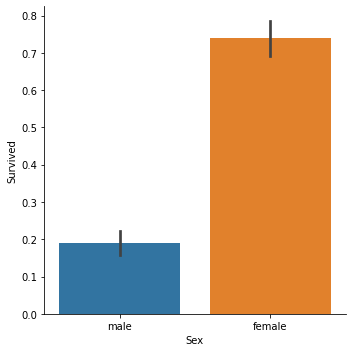

In [253]:
# sns.barplot()
sns.catplot(kind='bar', data=titanic_train, y="Survived", x='Sex')
plt.show()

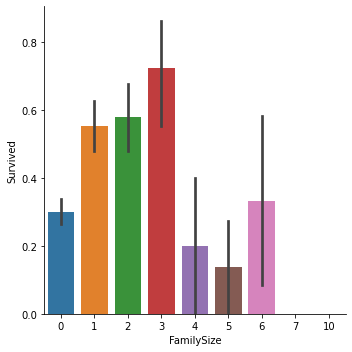

In [254]:
sns.catplot(kind='bar', data=titanic_train, y="Survived", x='FamilySize')
plt.show()

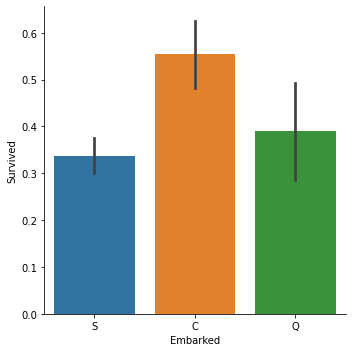

In [255]:
sns.catplot(kind='bar', data=titanic_train, y="Survived", x='Embarked')
plt.show()

<Figure size 1080x360 with 0 Axes>

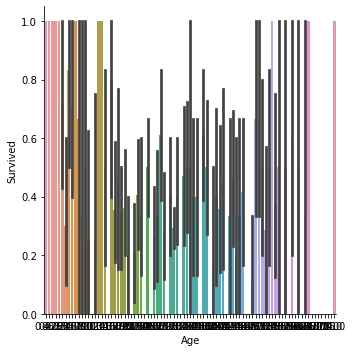

In [256]:
plt.figure(figsize=(15,5))
sns.catplot(kind='bar', data=titanic_train, y="Survived", x='Age')
plt.show()

In [257]:
# cut : 데이터를 몇 개의 범위를 기준으로 분류 
titanic_train['AgeGroup'] = pd.cut(titanic_train['Age'], bins=[0, 15, 50, 200], labels=['Child', 'Adult', 'Elder']) # bins = 급간 -> 0~15 , 15~50, 50~200 총 세 범위
titanic_train['AgeGroup'].head(3)

0    Adult
1    Adult
2    Adult
Name: AgeGroup, dtype: category
Categories (3, object): [Child < Adult < Elder]

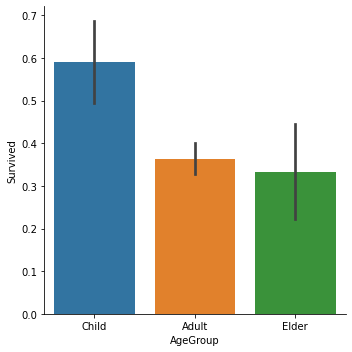

In [258]:
sns.catplot(kind='bar', data=titanic_train, y="Survived", x='AgeGroup')
plt.show()

In [259]:
titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed,AgeGroup
0,0,3,male,22.000000,7.2500,S,1,Mr,22.000000,0,Adult
1,1,1,female,38.000000,71.2833,C,1,Mrs,38.000000,0,Adult
2,1,3,female,26.000000,7.9250,S,0,Miss,26.000000,0,Adult
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0,Adult
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Rev,27.000000,0,Adult
887,1,1,female,19.000000,30.0000,S,0,Miss,19.000000,0,Adult
888,0,3,female,29.699118,23.4500,S,3,Miss,23.260598,1,Adult
889,1,1,male,26.000000,30.0000,C,0,Mr,26.000000,0,Adult


In [260]:
# pd.get_dummies(titanic_train)
dummies = pd.get_dummies(titanic_train[['Sex', 'Embarked', 'AgeGroup']])
dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0
2,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0
4,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,0,1,0
888,1,0,0,0,1,0,1,0
889,0,1,1,0,0,0,1,0


In [261]:
# titanic_train과 dummies를 병합 (기준 : 두 dataframe의 index)
merged_titanic_train = titanic_train.merge(dummies, left_index=True, right_index=True)
merged_titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed,AgeGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,3,male,22.000000,7.2500,S,1,Mr,22.000000,0,Adult,0,1,0,0,1,0,1,0
1,1,1,female,38.000000,71.2833,C,1,Mrs,38.000000,0,Adult,1,0,1,0,0,0,1,0
2,1,3,female,26.000000,7.9250,S,0,Miss,26.000000,0,Adult,1,0,0,0,1,0,1,0
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0,Adult,1,0,0,0,1,0,1,0
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0,Adult,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Rev,27.000000,0,Adult,0,1,0,0,1,0,1,0
887,1,1,female,19.000000,30.0000,S,0,Miss,19.000000,0,Adult,1,0,0,0,1,0,1,0
888,0,3,female,29.699118,23.4500,S,3,Miss,23.260598,1,Adult,1,0,0,0,1,0,1,0
889,1,1,male,26.000000,30.0000,C,0,Mr,26.000000,0,Adult,0,1,1,0,0,0,1,0


In [262]:
merged_titanic_train.drop(['Sex','Embarked','AgeGroup','Title'], axis=1) # 수치화된 데이터만 이따~~~~~~~~

,Survived,Pclass,Age,Fare,FamilySize,Age2,Imputed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,3,22.000000,7.2500,1,22.000000,0,0,1,0,0,1,0,1,0
1,1,1,38.000000,71.2833,1,38.000000,0,1,0,1,0,0,0,1,0
2,1,3,26.000000,7.9250,0,26.000000,0,1,0,0,0,1,0,1,0
3,1,1,35.000000,53.1000,1,35.000000,0,1,0,0,0,1,0,1,0
4,0,3,35.000000,8.0500,0,35.000000,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,27.000000,0,0,1,0,0,1,0,1,0
887,1,1,19.000000,30.0000,0,19.000000,0,1,0,0,0,1,0,1,0
888,0,3,29.699118,23.4500,3,23.260598,1,1,0,0,0,1,0,1,0
889,1,1,26.000000,30.0000,0,26.000000,0,0,1,1,0,0,0,1,0
